In [19]:
import numpy as np
import matplotlib.pyplot as plt
import bkw2d_particle as par
import bkw2d_sampling as sp

v_traj_100 = np.load('data/v_traj.npy')
v_traj = np.load('data_150/v_traj.npy')
score = np.load('data_150/score.npy')
fisher_divergence = np.load('data_150/fisher_divergence.npy')
entropy_decay_rate_exact = np.load('data/entropy_decay_rate_exact.npy')
entropy_decay_rate = np.load('data_150/entropy_decay_rate_NN.npy')
energy = np.load('data_150/energy_NN.npy')
L2_error = np.load('data_150/L2_error.npy')

## time
T = 5
t = 0
dt = 0.01
Nt = int((T-t)/dt)

## mesh
L = 4
Nr = 100
h = 2*L/Nr

V = np.linspace(-L+h/2,L-h/2,Nr)
VX, VY = np.meshgrid(V, V)
V_xy = np.hstack((VX.flatten()[:,None], VY.flatten()[:,None]))

In [ ]:
'''L2_error'''
plt.plot(L2_error, linewidth=3)
plt.xticks(ticks=np.linspace(0, Nt, 6), labels=['0','1','2','3','4','5'])
plt.xlabel('time')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('relative $L^2$ error')
plt.savefig('fig_150/eg1_error.png', bbox_inches='tight', dpi=300)

In [ ]:
## kde on mesh
f_mesh_1 = par.f_exact(V_xy, t=1)
f_mesh_1 = f_mesh_1.reshape(Nr, Nr)
f_kde_1 = par.compute_f_kde(v_traj[100,:,:], V_xy, eps=0.14)
f_kde_1 = f_kde_1.reshape(Nr, Nr)

f_mesh_25 = par.f_exact(V_xy, t=2.5)
f_mesh_25 = f_mesh_25.reshape(Nr, Nr)
f_kde_25 = par.compute_f_kde(v_traj[250,:,:], V_xy, eps=0.14)
f_kde_25 = f_kde_25.reshape(Nr, Nr)

f_mesh_5 = par.f_exact(V_xy, t=5)
f_mesh_5 = f_mesh_5.reshape(Nr, Nr)
f_kde_5 = par.compute_f_kde(v_traj[500,:,:], V_xy, eps=0.14)
f_kde_5 = f_kde_5.reshape(Nr, Nr)

In [ ]:
f_kde_1_100 = par.compute_f_kde(v_traj_100[100,:,:], V_xy, eps=0.15)
f_kde_1_100 = f_kde_1_100.reshape(Nr, Nr)

f_kde_25_100 = par.compute_f_kde(v_traj_100[250,:,:], V_xy, eps=0.15)
f_kde_25_100 = f_kde_25_100.reshape(Nr, Nr)

f_kde_5_100 = par.compute_f_kde(v_traj_100[500,:,:], V_xy, eps=0.15)
f_kde_5_100 = f_kde_5_100.reshape(Nr, Nr)

In [ ]:
'''kernel density estimation'''
plt.figure(1, figsize=(15,10))

plt.subplot(231)
plt.plot(V, f_mesh_1[49,:], '*-', linewidth=2)
plt.plot(V, f_kde_1[49,:], '*-', linewidth=2)
plt.xlabel('$v_x$')
plt.title('$f(\cdot, N/2, t=1)$')
plt.legend(['analytical', 'score-based particle'])

plt.subplot(232)
plt.plot(V, f_mesh_25[49,:], '*-', linewidth=2)
plt.plot(V, f_kde_25[49,:], '*-', linewidth=2)
plt.xlabel('$v_x$')
plt.title('$f(\cdot, N/2, t=2.5)$')
plt.legend(['analytical', 'score-based particle'])

plt.subplot(233)
plt.plot(V, f_mesh_5[49,:], '*-', linewidth=2)
plt.plot(V, f_kde_5[49,:], '*-', linewidth=2)
plt.xlabel('$v_x$')
plt.title('$f(\cdot, N/2, t=5)$')
plt.legend(['analytical', 'score-based particle'])

plt.subplot(234)
plt.plot(V, f_mesh_1[:,49], '*-', linewidth=2)
plt.plot(V, f_kde_1[:,49], '*-', linewidth=2)
plt.xlabel('$v_y$')
plt.title('$f(N/2, \cdot, t=1)$')
plt.legend(['analytical', 'score-based particle'])

plt.subplot(235)
plt.plot(V, f_mesh_25[:,49], '*-', linewidth=2)
plt.plot(V, f_kde_25[:,49], '*-', linewidth=2)
plt.xlabel('$v_x$')
plt.title('$f(N/2, \cdot, t=2.5)$')
plt.legend(['analytical', 'score-based particle'])

plt.subplot(236)
plt.plot(V, f_mesh_5[:,49], '*-', linewidth=2)
plt.plot(V, f_kde_5[:,49], '*-', linewidth=2)
plt.xlabel('$v_y$')
plt.title('$f(N/2, \cdot, t=5)$')
plt.legend(['analytical', 'score-based particle'])

plt.savefig('fig/eg1_kde_150.png', bbox_inches='tight', dpi=300)

In [ ]:
'''kernel density estimation'''
plt.figure(1, figsize=(15,10))

plt.subplot(231)
plt.plot(V, f_mesh_1[49,:], '*-', c='b')
plt.plot(V, f_kde_1_100[49,:], '*', c='lime', markersize=5)
plt.plot(V, f_kde_1[49,:], '*', c='r', markersize=5)
plt.xlabel('$v_x$')
plt.title('$f(\cdot, N/2, t=1)$')
plt.legend(['analytical', 'score-based particle $N=100^2$', 'score-based particle $N=150^2$'], fontsize=8, loc='lower center')

plt.subplot(232)
plt.plot(V, f_mesh_25[49,:], '*-', c='b')
plt.plot(V, f_kde_25_100[49,:], '*', c='lime', markersize=5)
plt.plot(V, f_kde_25[49,:], '*', c='r', markersize=5)
plt.xlabel('$v_x$')
plt.title('$f(\cdot, N/2, t=2.5)$')
plt.legend(['analytical', 'score-based particle $N=100^2$', 'score-based particle $N=150^2$'], fontsize=8, loc='lower center')

plt.subplot(233)
plt.plot(V, f_mesh_5[49,:], '*-', c='b')
plt.plot(V, f_kde_5_100[49,:], '*', c='lime', markersize=5)
plt.plot(V, f_kde_5[49,:], '*', c='r', markersize=5)
plt.xlabel('$v_x$')
plt.title('$f(\cdot, N/2, t=5)$')
plt.legend(['analytical', 'score-based particle $N=100^2$', 'score-based particle $N=150^2$'], fontsize=8, loc='lower center')

plt.subplot(234)
plt.plot(V, f_mesh_1[:,49], '*-', c='b', )
plt.plot(V, f_kde_1_100[:,49], '*', c='lime', markersize=5)
plt.plot(V, f_kde_1[:,49], '*', c='r', markersize=5)
plt.xlabel('$v_y$')
plt.title('$f(N/2, \cdot, t=1)$')
plt.legend(['analytical', 'score-based particle $N=100^2$', 'score-based particle $N=150^2$'], fontsize=8, loc='lower center')

plt.subplot(235)
plt.plot(V, f_mesh_25[:,49], '*-', c='b', )
plt.plot(V, f_kde_25_100[:,49], '*', c='lime', markersize=5)
plt.plot(V, f_kde_25[:,49], '*', c='r', markersize=5)
plt.xlabel('$v_x$')
plt.title('$f(N/2, \cdot, t=2.5)$')
plt.legend(['analytical', 'score-based particle $N=100^2$', 'score-based particle $N=150^2$'], fontsize=8, loc='lower center')

plt.subplot(236)
plt.plot(V, f_mesh_5[:,49], '*-', c='b', )
plt.plot(V, f_kde_5_100[:,49], '*', c='lime', markersize=5)
plt.plot(V, f_kde_5[:,49], '*', c='r', markersize=5)
plt.xlabel('$v_y$')
plt.title('$f(N/2, \cdot, t=5)$')
plt.legend(['analytical', 'score-based particle $N=100^2$', 'score-based particle $N=150^2$'], fontsize=8, loc='lower center')

plt.savefig('fig_150/eg1_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
'''fisher divergence'''
plt.plot(fisher_divergence, '-', linewidth=3)
plt.xticks(ticks=np.linspace(0, Nt, 6), labels=['0','1','2','3','4','5'])
plt.xlabel('time')
plt.title('relative Fisher divergence')

plt.savefig('fig_150/eg1_fisher.png', bbox_inches='tight', dpi=300)

In [ ]:
'''energy entropy'''
plt.figure(1, figsize=(10,5))

plt.subplot(121)
plt.plot(2*np.ones(501),'-', linewidth=3)
plt.plot(energy, '-', linewidth=3)
plt.legend(['analytical', 'score-based particle'])
plt.xticks(ticks=np.linspace(0, Nt, 6), labels=['0','1','2','3','4','5'])
plt.xlabel('time')
#plt.ylim(2.0057,2.0062)
plt.ylim(1.999,2.007)
plt.title('total energy')

plt.subplot(122)
plt.plot(entropy_decay_rate_exact,'-', linewidth=3)
plt.plot(entropy_decay_rate, '-', linewidth=3)
plt.legend(['analytical', 'score-based particle'])
plt.xticks(ticks=np.linspace(0, Nt, 6), labels=['0','1','2','3','4','5'])
plt.xlabel('time')
plt.title('entropy decay rate')

plt.savefig('fig_150/eg1_quantitative.png', bbox_inches='tight', dpi=300)

In [ ]:
'''score'''
fig = plt.figure(1, figsize=(15,20))

v_1 = v_traj[100,:,:]
score_exact_1 = par.score_exact(v_1, 1)
score_1 = score[100,:,:]

plt.subplot(431)
plt.plot(v_1[:,0], score_exact_1[:,0], 'bo', markersize=1, alpha=1)
plt.plot(v_1[:,0], score_1[:,0], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_x$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_x$')

plt.subplot(432)
plt.plot(v_1[:,1], score_exact_1[:,0], 'bo', markersize=1, alpha=1)
plt.plot(v_1[:,1], score_1[:,0], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_y$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_x$')

ax = fig.add_subplot(433, projection='3d')
ax.scatter(v_1[:,0], v_1[:,1], score_exact_1[:,0], marker='o', c='b', s=0.1, alpha=0.4)
ax.scatter(v_1[:,0], v_1[:,1], score_1[:,0], marker='o', c='r', s=0.1, alpha=1)
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_box_aspect([6, 7, 8])
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_x$')

plt.subplot(434)
plt.plot(v_1[:,0], score_exact_1[:,1], 'bo', markersize=1, alpha=1)
plt.plot(v_1[:,0], score_1[:,1], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_x$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_y$')

plt.subplot(435)
plt.plot(v_1[:,1], score_exact_1[:,1], 'bo', markersize=1, alpha=1)
plt.plot(v_1[:,1], score_1[:,1], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_y$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_y$')

ax2 = fig.add_subplot(436, projection='3d')
ax2.scatter(v_1[:,0], v_1[:,1], score_exact_1[:,1], marker='o', c='b', s=0.1, alpha=1)
ax2.scatter(v_1[:,0], v_1[:,1], score_1[:,1], marker='o', c='r', s=0.1, alpha=0.2)
ax2.set_xlabel('$v_x$')
ax2.set_ylabel('$v_y$')
ax2.set_box_aspect([6, 7, 8])
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_y$')

########################################################################

v_5 = v_traj[-1,:,:]
score_exact_5 = par.score_exact(v_5, T)
score_5 = score[-1,:,:]

plt.subplot(437)
plt.plot(v_5[:,0], score_exact_5[:,0], 'bo', markersize=1, alpha=1)
plt.plot(v_5[:,0], score_5[:,0], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_x$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_x$')

plt.subplot(438)
plt.plot(v_5[:,1], score_exact_5[:,0], 'bo', markersize=1, alpha=1)
plt.plot(v_5[:,1], score_5[:,0], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_y$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_x$')

ax3 = fig.add_subplot(439, projection='3d')
ax3.scatter(v_5[:,0], v_5[:,1], score_exact_5[:,0], marker='o', c='b', s=0.1, alpha=1)
ax3.scatter(v_5[:,0], v_5[:,1], score_5[:,0], marker='o', c='r', s=0.1, alpha=0.2)
ax3.set_xlabel('$v_x$')
ax3.set_ylabel('$v_y$')
ax3.set_box_aspect([7, 6, 8])
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_x$')

plt.subplot(4,3,10)
plt.plot(v_5[:,0], score_exact_5[:,1], 'bo', markersize=1, alpha=1)
plt.plot(v_5[:,0], score_5[:,1], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_x$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_y$')

plt.subplot(4,3,11)
plt.plot(v_5[:,1], score_exact_5[:,1], 'bo', markersize=1, alpha=1)
plt.plot(v_5[:,1], score_5[:,1], 'ro', markersize=1, alpha=0.2)
plt.xlabel('$v_y$')
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_y$')

ax4 = fig.add_subplot(4,3,12, projection='3d')
ax4.scatter(v_5[:,0], v_5[:,1], score_exact_5[:,1], marker='o', c='b', s=0.1, alpha=0.4)
ax4.scatter(v_5[:,0], v_5[:,1], score_5[:,1], marker='o', c='r', s=0.1, alpha=1)
ax4.set_xlabel('$v_x$')
ax4.set_ylabel('$v_y$')
ax4.set_box_aspect([7, 6, 8])
plt.legend(['analytical', 'score-based particle'])
plt.title('$score_y$')

plt.savefig('fig_150/eg1_score.png', bbox_inches='tight', dpi=300)

In [20]:
nex=150**2
sampling_model_0 = sp.Sampling(nex=nex, time=0, seed=None)
v_0 = np.array(sampling_model_0.rejection_sampling())

sampling_model_0 = sp.Sampling(nex=nex, time=1, seed=None)
v_1 = np.array(sampling_model_0.rejection_sampling())

sampling_model_0 = sp.Sampling(nex=nex, time=5, seed=None)
v_5 = np.array(sampling_model_0.rejection_sampling())

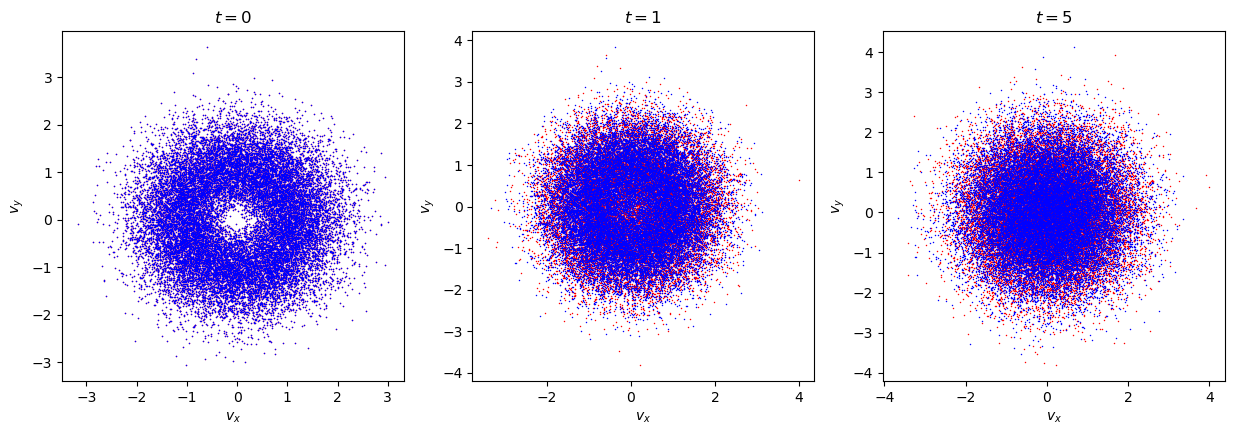

In [22]:
'''particle location'''
fig = plt.figure(1, figsize=(15,10))

plt.subplot(231)
plt.plot(v_0[:,0], v_0[:,1], 'r*', markersize=0.5, alpha=1)
plt.plot(v_traj[0,:,0], v_traj[0,:,1], 'b*', markersize=0.5, alpha=1)

plt.xlabel('$v_x$')
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.title('$t=0$')

plt.subplot(232)
plt.plot(v_1[:,0], v_1[:,1], 'r*', markersize=0.5, alpha=1)
plt.plot(v_traj[100,:,0], v_traj[100,:,1], 'b*', markersize=0.5, alpha=1)
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.title('$t=1$')

plt.subplot(233)
plt.plot(v_5[:,0], v_5[:,1], 'r*', markersize=0.5, alpha=1)
plt.plot(v_traj[500,:,0], v_traj[500,:,1], 'b*', markersize=0.5, alpha=1)
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.title('$t=5$')

# plt.subplot(234)
# plt.plot(v_0[:,0], v_0[:,1], 'b*', markersize=0.5, alpha=1)
# plt.xlabel('$v_x$')
# plt.ylabel('$v_y$')
# plt.title('$t=0$')

# plt.subplot(235)
# plt.plot(v_1[:,0], v_1[:,1], 'b*', markersize=0.5, alpha=1)
# plt.xlabel('$v_x$')
# plt.ylabel('$v_y$')
# plt.title('$t=0$')

# plt.subplot(236)
# plt.plot(v_5[:,0], v_5[:,1], 'b*', markersize=0.5, alpha=1)
# plt.xlabel('$v_x$')
# plt.ylabel('$v_y$')
# plt.title('$t=0$')

plt.savefig('fig_150/eg1_par_loc.png', bbox_inches='tight', dpi=300)

In [ ]:
'''particle trajectory'''
t = np.arange(0, T+dt, dt)
trajectories = []
trajectories_number = 100
for i in range(trajectories_number):
    x = v_traj[:,i,0]
    y = v_traj[:,i,1]
    trajectories.append((x, y, t))

# Plot the 3D trajectories
fig2 = plt.figure(1, figsize=(5,5))
ax = fig2.add_subplot(111, projection='3d')
for i in range(trajectories_number):
    x, y, z = trajectories[i]
    ax.plot(x, y, z, '-', linewidth=1.5)
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$t$')
plt.title('trajectories of certain particles')
plt.savefig('fig_150/eg1_par_traj.png', bbox_inches='tight', dpi=300)